In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# Variables for coefficients
coef1_sym = symbols('coef1')
coef2_sym = symbols('coef2')
coef3_sym = symbols('coef3')
coef4_sym = symbols('coef4')
coef5_sym = symbols('coef5')
coef6_sym = symbols('coef6')
coef7_sym = symbols('coef7')
coef8_sym = symbols('coef8')

In [14]:
# Basis matrix
t = 10
basis_matrix = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 1, 0, 0, 0],
                         [0, 0, 0, 0, 0, 1, 0, 0],
                         [1, t, t**2, t**3, 0, 0, 0, 0],
                         [0, 1, 2 * t, 3 * t**2, 0, 0, 0, 0],
                         [0, 0, 0, 0, 1, t, t**2, t**3],
                         [0, 0, 0, 0, 0, 1, 2 * t, 3 * t**2]])
print(basis_matrix)

[[   1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    1    0    0]
 [   1   10  100 1000    0    0    0    0]
 [   0    1   20  300    0    0    0    0]
 [   0    0    0    0    1   10  100 1000]
 [   0    0    0    0    0    1   20  300]]


In [15]:
# Matrix multiplication using pseudo-inverse
arr = np.array([[1],
                [1],
                [0],
                [1],
                [5],
                [1],
                [5],
                [5]])
mul = np.linalg.pinv(basis_matrix)
solutions = np.dot(mul, arr)
print(solutions)

[[ 1.0000000e+00]
 [ 1.0000000e+00]
 [-1.8000000e-01]
 [ 1.2000000e-02]
 [-1.0185019e-13]
 [ 1.0000000e+00]
 [-5.5000000e-01]
 [ 5.0000000e-02]]


In [16]:
# Coefficients as dictionary
coefficients_dict = {
    coef1_sym: solutions[0, 0],
    coef2_sym: solutions[1, 0],
    coef3_sym: solutions[2, 0],
    coef4_sym: solutions[3, 0],
    coef5_sym: solutions[4, 0],
    coef6_sym: solutions[5, 0],
    coef7_sym: solutions[6, 0],
    coef8_sym: solutions[7, 0]
}

In [17]:
# alpha values as a list
alpha_values = [1.0000000e+00, 1.0000000e+00, -1.8000000e-01, 1.2000000e-02,
                -1.0185019e-13, 1.0000000e+00, -5.5000000e-01, 5.0000000e-02]

In [18]:
# Generate T values
T = np.linspace(0, 10, 100)

In [19]:
# Functions of z1_dot & z2_dot
def z1_dot(T):
    return alpha_values[1] + 2 * alpha_values[2] * T + 3 * alpha_values[3] * (T ** 2)

def z2_dot(T):
    return alpha_values[5] + 2 * alpha_values[6] * T + 3 * alpha_values[7] * (T ** 2)

In [20]:
# Value of X2
x1 = z1_dot(T)
x3 = z2_dot(T)
def x2(T):
    return x3 / x1
X2 = x2(T)

In [21]:
# Values of X1 & X3
X1 = alpha_values[0] + alpha_values[1] * T + alpha_values[2] * (T ** 2) + alpha_values[3] * (T ** 3)
X3 = alpha_values[4] + alpha_values[5] * T + alpha_values[6] * (T ** 2) + alpha_values[7] * (T ** 3)

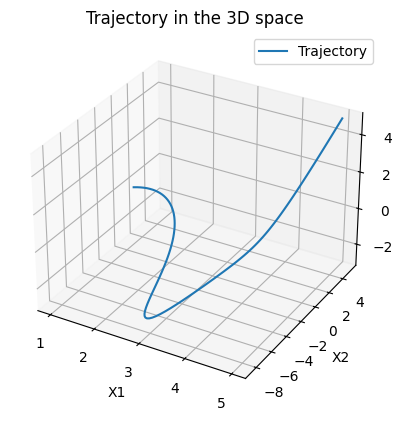

In [22]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X1, X2, X3, label='Trajectory')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Trajectory in the 3D space')
ax.legend()
plt.show()